## EN2550: Assignment 03 on Object Counting on a Conveyor Belt

### Name: Hettihewa.D.P.G
### Index: 190231R

(01)


01)

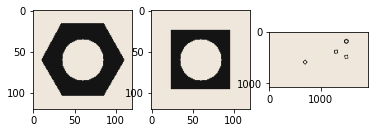

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'./AS3/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'./AS3/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'./AS3/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

2)

trehold values: 20.0 20.0 20.0


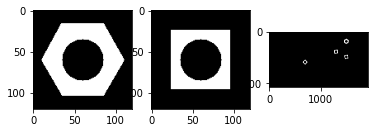

In [21]:
hexGrey = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squareGrey = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyorGrey = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)
img = [hexGrey, squareGrey, conveyorGrey]
thr1, hist1 = cv.threshold(hexGrey,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
thr2, hist2 = cv.threshold(squareGrey,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)  
thr3, hist3 = cv.threshold(conveyorGrey,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
fig, ax = plt. subplots(1,3)
ax[0].imshow(hist1, 'gray')
ax[1].imshow(hist2, 'gray')
ax[2].imshow(hist3, 'gray')
print("trehold values:",thr1, thr2, thr3)
plt.show()

3)

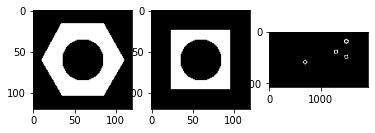

In [22]:
ker = np.ones((3,3),np.uint8)
morp1 = cv.morphologyEx(hist1, cv.MORPH_CLOSE, ker)
morp2 = cv.morphologyEx(hist2, cv.MORPH_CLOSE, ker)
morp3 = cv.morphologyEx(hist3, cv.MORPH_CLOSE, ker)
fig, ax = plt. subplots(1,3)
ax[0].imshow(morp1, 'gray')
ax[1].imshow(morp2, 'gray')
ax[2].imshow(morp3, 'gray')
plt.show()
images = [hexnut_template, squarenut_template, conveyor_f100]
morped = [morp1, morp2, morp3]
names = ["hexnut_template", "squarenut_template", "conveyor_f100"]



4)

hexnut_template

[Statistics - Left] 10
[Statistics - Top] 16
[Statistics - Width] 101
[Statistics - Height] 88
[Statistics - Area] 4728
[Statistics - Centroid] (59.83375634517766, 59.22356175972927)


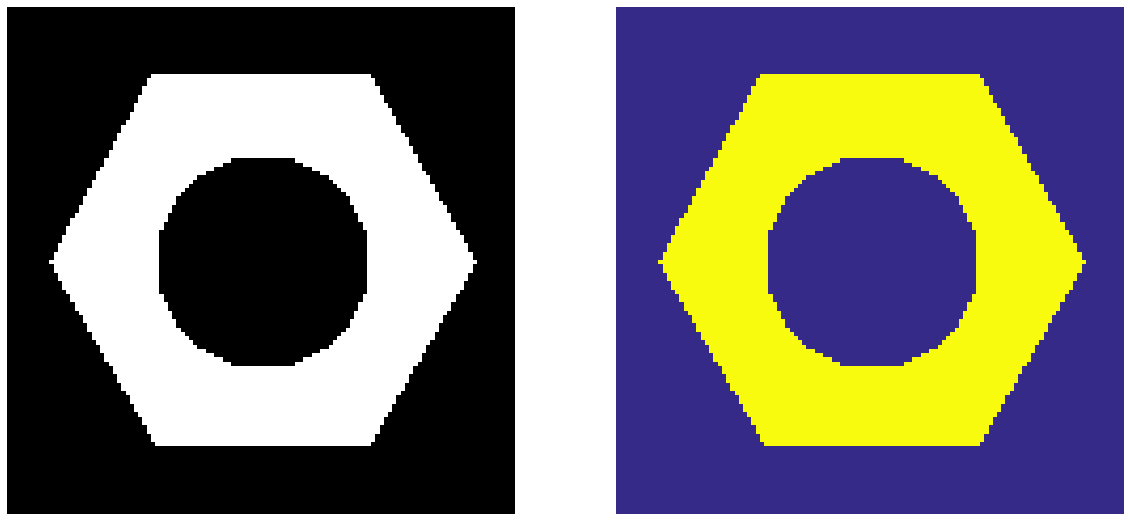

squarenut_template

[Statistics - Left] 24
[Statistics - Top] 24
[Statistics - Width] 72
[Statistics - Height] 72
[Statistics - Area] 3227
[Statistics - Centroid] (59.196777192438795, 59.196777192438795)


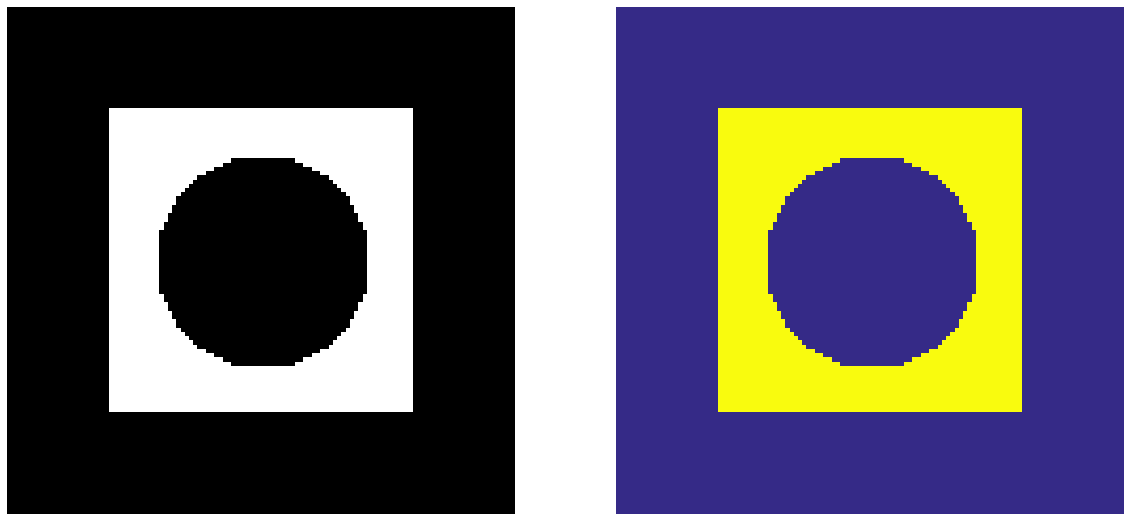

conveyor_f100

[Statistics - Left] 650
[Statistics - Top] 550
[Statistics - Width] 101
[Statistics - Height] 101
[Statistics - Area] 3144
[Statistics - Centroid] (700.0, 600.0)


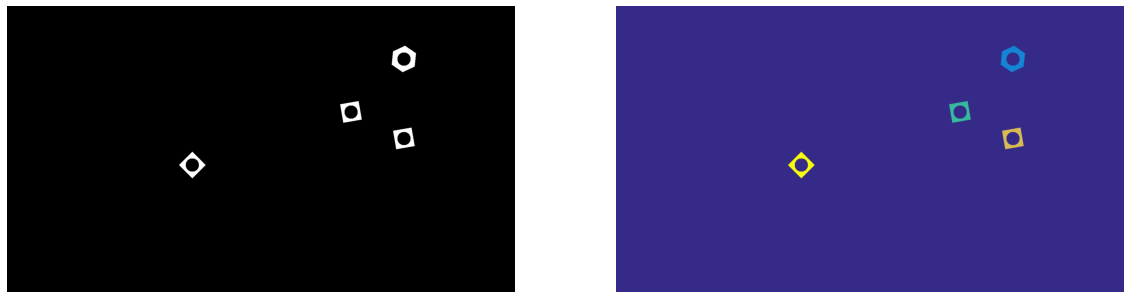

In [23]:
for n in range(3):
    print(names[n])
    output = cv.connectedComponentsWithStats(morped[n], 4, cv.CV_32S)
    numLabels = output[0]
    labels = output[1]
    stats = output[2]
    centroids = output[3]
    mask = np.zeros(hexGrey.shape, dtype="uint8")
    for i in range(1, numLabels):
        x = stats[i, cv.CC_STAT_LEFT]
        y = stats[i, cv.CC_STAT_TOP]
        w = stats[i, cv.CC_STAT_WIDTH]
        h = stats[i, cv.CC_STAT_HEIGHT]
        area = stats[i, cv.CC_STAT_AREA]
        (cX, cY) = centroids[i]
    print("\n[Statistics - Left] {}".format(x))
    print("[Statistics - Top] {}".format(y))
    print("[Statistics - Width] {}".format(w))
    print("[Statistics - Height] {}".format(h))
    print("[Statistics - Area] {}".format(area))
    print("[Statistics - Centroid] {}".format((cX, cY)))
    cm = cv.applyColorMap((labels/np.amax(labels)*255).astype("uint8"),cv.COLORMAP_PARULA)
    fig, ax = plt. subplots(1,2, figsize = (20, 15))
    ax[0].imshow(cv.cvtColor(morped[n], cv.COLOR_BGR2RGB))
    ax[0].axis('off')
    ax[1].imshow(cv.cvtColor(cm, cv.COLOR_BGR2RGB))
    ax[1].axis('off')
    plt.show()
        

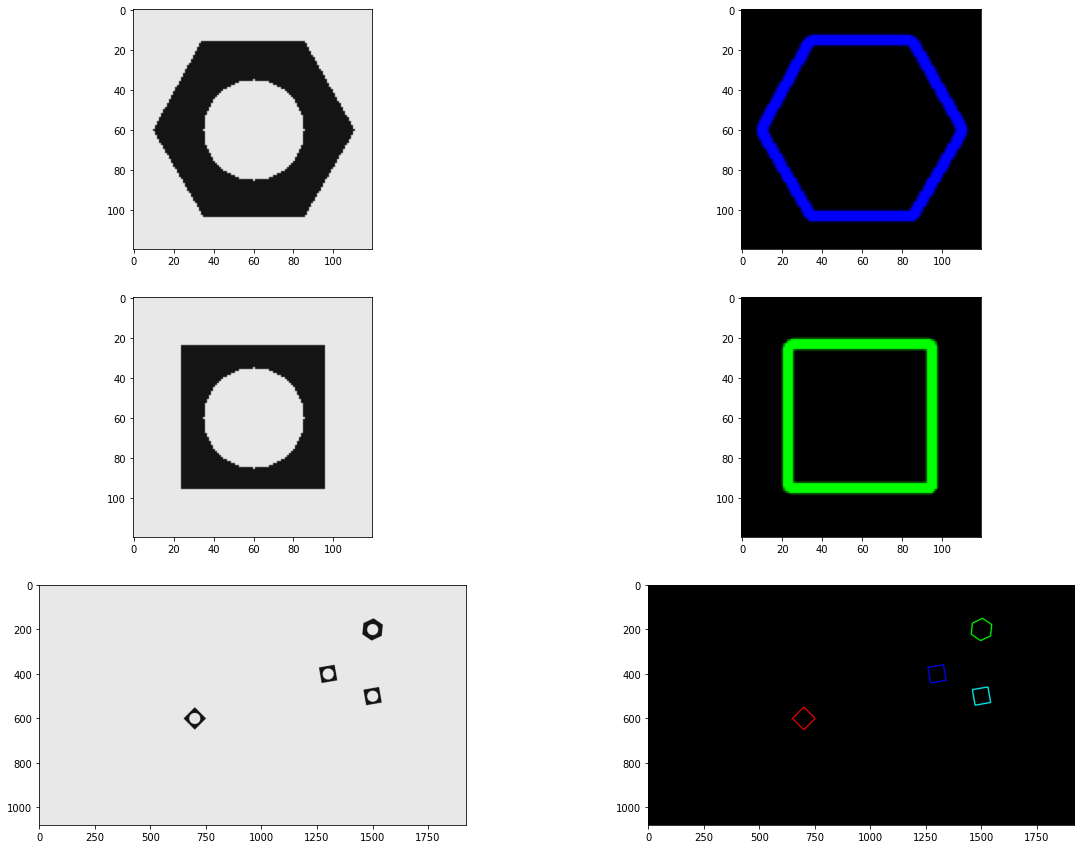

In [24]:
colours = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255)]
fig, ax = plt. subplots(3,2, figsize = (20, 15))
cnt = 0
for i in range(3):
    img = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    edges = cv.Canny(img, 0, 255)
    contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    img_contours = np.zeros(images[i].shape,np.uint8)
    
    for j in range(len(contours)):
        if (hierarchy[0,j,3] == -1):
            cv.drawContours(img_contours, contours, j,colours[cnt%4], thickness=3, lineType=cv.LINE_AA)
            cnt+=1

    ax[i][0].imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
    ax[i][1].imshow(cv.cvtColor(img_contours, cv.COLOR_RGB2BGR))


### 02)Detecting Objects on a Synthetic Conveyor

1)

In [25]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture(r'./AS3/conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


6.816769371198461e-14 5000.0
0.0001008816445491334 4905.0
0.0001008816445491334 4905.0


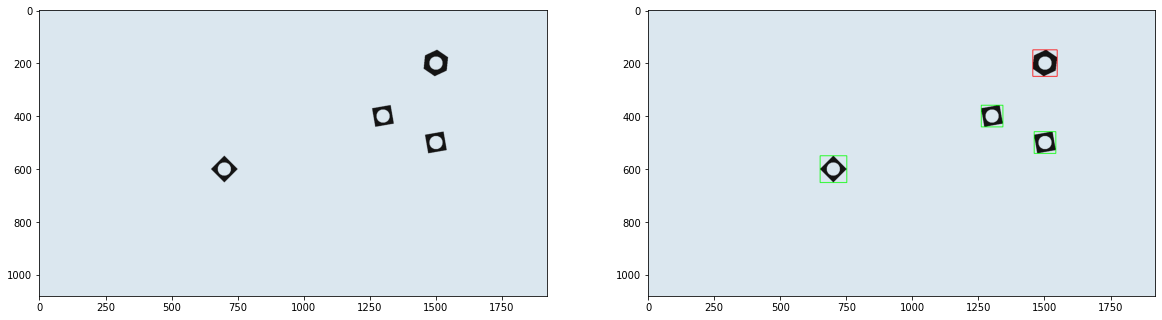

In [26]:
binImg = []
for i in range(3):
    grayImg = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    binaryImg = cv.threshold(grayImg, 50, 255, cv.THRESH_BINARY_INV)[1]
    binImg.append(binaryImg)
contours,hierarchy = cv.findContours(binImg[0],2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(binImg[1],2,1)
cnt2 = contours[0]
contours,hierarchy = cv.findContours(binImg[2],2,1)
belt = images[2].copy()
for cnt in contours:
    
    ret1 = cv.matchShapes(cnt1,cnt,1,0.0)
    ret2 = cv.matchShapes(cnt2,cnt,1,0.0)
    if ret1 <=0.001:
        (x, y, w, h) = cv.boundingRect(cnt)
        cv.rectangle(belt, (x, y), (x + w, y + h), (255, 0, 0), 2)
    if ret2 <=0.001:
        (x, y, w, h) = cv.boundingRect(cnt)
        cv.rectangle(belt, (x, y), (x + w, y + h), (0, 255, 0), 2)
        area = cv.contourArea(cnt)
        print( ret2, area )
fig, ax = plt. subplots(1,2, figsize = (20, 20))
ax[0].imshow(images[2])
ax[1].imshow(belt)


     

2)

In [46]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture(r'./AS3/conveyor.mp4')
f = 0
frame = []    
n = 0  
count = 0
frame_array = []
shape = (1080, 1920, 3)
out = cv.VideoWriter(r'./AS3/conveyor_result_190231R.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
while cap.isOpened():                                  
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break  
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    grayImg = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    binaryImg = cv.threshold(grayImg, 50, 255, cv.THRESH_BINARY_INV)[1]
    contours,hierarchy = cv.findContours(binaryImg,2,1)
    pn = n
    n = 0
    for cnt in contours:
        area = cv.contourArea(cnt)
        ret1 = cv.matchShapes(cnt1,cnt,1,0.0)
        ret2 = cv.matchShapes(cnt2,cnt,1,0.0)
        if ret1 <=0.001 and area > 4000:
            (x, y, w, h) = cv.boundingRect(cnt)
            cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            n+=1
        if ret2 <=0.001 and area > 4000:
            (x, y, w, h) = cv.boundingRect(cnt)
            cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            area = cv.contourArea(cnt)
            n+=1
    if pn < n:
        count += 1
    text = 'Current Frame Count:' + str(n)
    cv.putText(frame,text , (300, 100), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)
    text = 'Total Count:' + str(count)
    cv.putText(frame,text , (730, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    if cv.waitKey(1) == ord('q'):  
        break
    out.write(frame)

cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
